# Исследование причин убыточности развлекательного приложения

Для анализа предоставлены данные о пользователях и расходах на маркетинг развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**Цель исследования** — установить причину убытков компании, в том числе найдя ответы на следующие вопросы:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Ход исследования**

Для анализа доступны три файла:  
- visits_info_short.csv — лог сервера с информацией о посещениях сайта, 
- orders_info_short.csv — информация о заказах, 
- costs_info_short.csv — информация о расходах на рекламу.


Исследование пройдёт в шесть этапов:
 1. Предобработка данных.
 2. Формирование необходимых функций.
 3. Исследователяский анализ профилей пользователей.
 4. Анализ расходов на маркетинг.
 5. Оценка окупаемости.
 6. Вывод.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-подготовка-их-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и подготовка их к анализу</a></span><ul class="toc-item"><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Определение-функций-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Определение-функций-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение функций для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span><ul class="toc-item"><li><span><a href="#Зададим-функции-для-вычисления-значений-метрик:" data-toc-modified-id="Зададим-функции-для-вычисления-значений-метрик:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Зададим функции для вычисления значений метрик:</a></span><ul class="toc-item"><li><span><a href="#Создание-профилей-пользователей:" data-toc-modified-id="Создание-профилей-пользователей:-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Создание профилей пользователей:</a></span></li><li><span><a href="#Подсчет-Retention-Rate" data-toc-modified-id="Подсчет-Retention-Rate-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Подсчет Retention Rate</a></span></li><li><span><a href="#Подсчет-конверсии" data-toc-modified-id="Подсчет-конверсии-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Подсчет конверсии</a></span></li><li><span><a href="#Подсчет-LTV-и-ROI" data-toc-modified-id="Подсчет-LTV-и-ROI-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Подсчет LTV и ROI</a></span></li></ul></li><li><span><a href="#Зададим-функции-для-построения-графиков:" data-toc-modified-id="Зададим-функции-для-построения-графиков:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Зададим функции для построения графиков:</a></span><ul class="toc-item"><li><span><a href="#Сглаживание-данных:" data-toc-modified-id="Сглаживание-данных:-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Сглаживание данных:</a></span></li><li><span><a href="#Построение-графика-Retention-Rate" data-toc-modified-id="Построение-графика-Retention-Rate-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Построение графика Retention Rate</a></span></li><li><span><a href="#Построение-графика-конверсии" data-toc-modified-id="Построение-графика-конверсии-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Построение графика конверсии</a></span></li><li><span><a href="#Визуализация--LTV-и-ROI" data-toc-modified-id="Визуализация--LTV-и-ROI-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Визуализация  LTV и ROI</a></span></li></ul></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Составление-профилей-пользователей." data-toc-modified-id="Составление-профилей-пользователей.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Составление профилей пользователей.</a></span></li><li><span><a href="#Распределение-по-странам" data-toc-modified-id="Распределение-по-странам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределение по странам</a></span></li><li><span><a href="#Распределение-по-устройствам" data-toc-modified-id="Распределение-по-устройствам-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Распределение по устройствам</a></span></li><li><span><a href="#Распределение-по-каналам-привлечения" data-toc-modified-id="Распределение-по-каналам-привлечения-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Распределение по каналам привлечения</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Общая-сумма-расходов-на-маркетинг" data-toc-modified-id="Общая-сумма-расходов-на-маркетинг-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общая сумма расходов на маркетинг</a></span></li><li><span><a href="#Распределение-трат-по-рекламным-источникам" data-toc-modified-id="Распределение-трат-по-рекламным-источникам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Распределение трат по рекламным источникам</a></span></li><li><span><a href="#Визуализация-изменения-расходов-во-времени-по-каждому-источнику" data-toc-modified-id="Визуализация-изменения-расходов-во-времени-по-каждому-источнику-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Визуализация изменения расходов во времени по каждому источнику</a></span></li><li><span><a href="#Средняя-стоимость-привлечения-одного-пользователя-по-каждому-источнику" data-toc-modified-id="Средняя-стоимость-привлечения-одного-пользователя-по-каждому-источнику-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Средняя стоимость привлечения одного пользователя по каждому источнику</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Оцените-окупаемость-рекламы" data-toc-modified-id="Оцените-окупаемость-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span><ul class="toc-item"><li><span><a href="#Анализ-окупаемости-рекламы" data-toc-modified-id="Анализ-окупаемости-рекламы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ окупаемости рекламы</a></span></li><li><span><a href="#Конверсия-и-удержание" data-toc-modified-id="Конверсия-и-удержание-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Конверсия и удержание</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-устройствам-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-странам-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по странам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-рекламным-каналам-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по рекламным каналам</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

### Загрузка данных и подготовка их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучим данные и выполним предобработку. Выясним, есть ли в данных пропуски и дубликаты. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')

Рассмотрим последовательно каждый датафрейм - общую информацию о данных, а также проверим наличие дубликатов и пропусков

In [3]:
visits.info()
visits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
visits.duplicated().sum()

0

Фрейм с посещениями приложения не содержит ни пропусков, ни дубликатов.
Для удобства имеет смысл привести названия полей к "змеиному регистру".
Типы данных корректны, кроме полей с началом и концом сессий. Их следует заменить на тип данных datetime

In [5]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Фрейм visits приведен в порядок. Рассмотрим фрейм с заказами.

In [7]:
orders.info()
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [8]:
orders.duplicated().sum()

0

Пропусков и дубликатов не выявлено. Проблемы идентичны предыдущему фрейму - названия полей и тип данных datetime. Исправляем по аналогии.

In [9]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [10]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Проблемы устранены. Рассмотрим третий фрейм.

In [11]:
costs.info()
costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [12]:
costs.duplicated().sum()

0

Пропусков и дубликатов также нет. Проблемы аналогичны предыдущим.

In [13]:
costs = costs.rename(columns={'Channel': 'channel'})

In [14]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Промежуточный вывод

На этапе предобработки данных рассмотрены 3 датафрейма, содержащие следующию информацию:

- посещения пользователями приложения
- покупки в приложении
- затраты на рекламу

Пропуски и дубликаты в данных отсутствуют.
Названия полей приведены к стандарту. Поля, содержащие информацию о дате/времени событий приведены к типу данных datetime.

### Определение функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Зададим функции для вычисления значений метрик:

##### Создание профилей пользователей:

In [15]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### Подсчет Retention Rate

In [16]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

##### Подсчет конверсии

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

##### Подсчет LTV и ROI

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Зададим функции для построения графиков:

##### Сглаживание данных:

In [19]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

##### Построение графика Retention Rate

In [20]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

##### Построение графика конверсии

In [21]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

##### Визуализация  LTV и ROI

In [22]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Промежуточный вывод

На данном этапе заданы функции для создания профилей пользователей, расчета удержания, конверсии, LTV и ROI.
Также заданы функции для построения графиков по рассчитанным значениям.

### Исследовательский анализ данных

- Составление профили пользователей. Определение минимальной и максимальной даты привлечения пользователей.
- Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей? Таблица, отражающая количество пользователей и долю платящих из каждой страны.
- Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи? Таблица, отражающая количество пользователей и долю платящих для каждого устройства.
- Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. Таблица, отражающая количество пользователей и долю платящих для каждого канала привлечения.

#### Составление профилей пользователей.

С помощью функции get_profiles сформируем профили пользователей из имеющихся исходных данных.

In [23]:
profiles = get_profiles(visits, orders, None, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [24]:
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


В нашем распоряжении данные о пользователях, привлеченных в период с 01 мая по 27 октября 2019 г.

#### Распределение по странам

In [25]:
prof_country = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'})
prof_country.columns = ['total_users', 'payers']
prof_country['percent_of_payers'] = prof_country['payers'] / prof_country['total_users'] * 100
prof_country.sort_values(by='percent_of_payers', ascending=False)

,total_users,payers,percent_of_payers
region,,,
United States,100002,6902,6.901862
Germany,14981,616,4.111875
UK,17575,700,3.982930
France,17450,663,3.799427


В приложение приходят пользователи из 4-х стран: США, Германия, Великобритания и Франция.

Подавляющее большинство пользователей - из США. Оттуда же наибольший процент платящих пользователей - 6,9 %

Из Германии, Великобритании и Франции пользователей на порядок меньше, и процент платящих пользователей также ниже - в районе 4 %.

#### Распределение по устройствам

In [26]:
prof_device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'})
prof_device.columns = ['total_users', 'payers']
prof_device['percent_of_payers'] = prof_device['payers'] / prof_device['total_users'] * 100
prof_device.sort_values(by='percent_of_payers', ascending=False)

,total_users,payers,percent_of_payers
device,,,
Mac,30042,1912,6.364423
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790


Клиенты пользуются 4-мя типами устройств: Mac, IPhone, Android и PC.

Самый большой процент платящих - среди пользователей Mac - 6,4 %. При этом общее количество пользователей Mac - наименьшее среди представленных устройств.

На платформу IPhone приходится наибольшее общее количество пользователей, при этом доля платящих несколько отстает от Mac - 6,2 %.

Наименьший процент платящих пользователей - на платформе PC - 5 %. При этом общее количество пользователей PC тоже на низклом уровне.

#### Распределение по каналам привлечения

In [27]:
prof_channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'})
prof_channel.columns = ['total_users', 'payers']
prof_channel['percent_of_payers'] = prof_channel['payers'] / prof_channel['total_users'] * 100
prof_channel.sort_values(by='percent_of_payers', ascending=False)

,total_users,payers,percent_of_payers
channel,,,
FaceBoom,29144,3557,12.204914
AdNonSense,3880,440,11.340206
lambdaMediaAds,2149,225,10.469986
TipTop,19561,1878,9.600736
RocketSuperAds,4448,352,7.913669
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531
MediaTornado,4364,156,3.574702
LeapBob,8553,262,3.063253


Больше всего пользователей (за исключением органиков) прошло по каналу FaceBoom. Здесь же - наибольший процент платящих пользователей - 12,2 %.

На 2 и 3 месте по проценту платящих - AdNonSense и lambdaMediaAds - 11,3 % и 10,5 % соответственно. Однако общее число привлеченных пользователей в этих двух каналах невелико.

А на 4 месте по проценту платящих (и на 2 - по общему количеству пользователей) - платформа TipTop с 9,6 %.

#### Промежуточный вывод

На этапе исследовательского анализа сформированы проыили пользователей и определены характеристики наиболее потенциально привлекательных пользователей.

- так, приложением пользуются в основном клиенты из США, они же и наиболее склонны платить
- наиболее платежеспособны пользователи Mac, но их же и меньше всего. Следует обратить на них особое внимание при таргетировании рекламы
- самый перспективный канал привлечения пользователей - FaceBoom. Однако TipTop также имеет хорошие перспективы

### Маркетинг

- Подсчет общей суммы расходов на маркетинг.
- Распределение трат по рекламным источникам? 
- Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
- Средняя стоимость привлечения одного пользователя (CAC) из каждого источника. 

#### Общая сумма расходов на маркетинг

In [28]:
round(costs['costs'].sum(), 1)

105497.3

Общая сумма расходов на маркетинг составила 105 497,3

#### Распределение трат по рекламным источникам

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


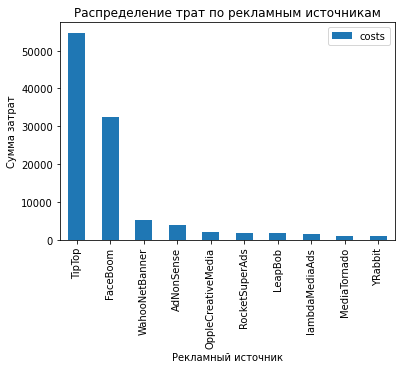

In [29]:
display(costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False))
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False).plot(kind='bar')
plt.title('Распределение трат по рекламным источникам')
plt.xlabel('Рекламный источник')
plt.ylabel('Сумма затрат');

Подавляющее большинство затрат на рекламу приходится на источники TipTop (более 50 000) и FaceBoom (более 30 000). Остальные источники существенно меньше.

#### Визуализация изменения расходов во времени по каждому источнику

Создадим необходимые для группировки поля (месяц и неделя)

In [30]:
costs['date'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['date'].dt.month
costs['week'] = costs['date'].dt.isocalendar().week
costs.head()

,dt,channel,costs,date,month,week
0,2019-05-01,FaceBoom,113.3,2019-05-01,5,18
1,2019-05-02,FaceBoom,78.1,2019-05-02,5,18
2,2019-05-03,FaceBoom,85.8,2019-05-03,5,18
3,2019-05-04,FaceBoom,136.4,2019-05-04,5,18
4,2019-05-05,FaceBoom,122.1,2019-05-05,5,18


Далее, следует дважды провести группировку - по неделе и месяцу соответственно.

In [31]:
costs_weekly = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
costs_weekly.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2


In [32]:
costs_monthly = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
costs_monthly.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2


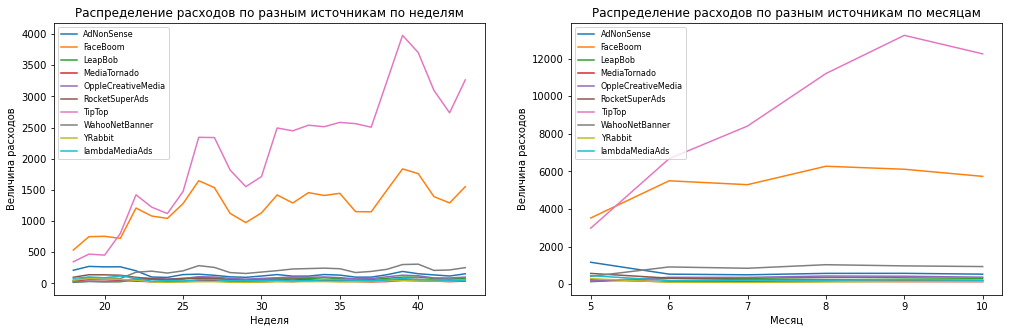

In [33]:
fig, ax = plt.subplots(figsize = (17,5))
costs_weekly.plot(ax=plt.subplot(1, 2, 1)).legend(loc=2, prop={'size': 8})
plt.title('Распределение расходов по разным источникам по неделям')
plt.xlabel('Неделя')
plt.ylabel('Величина расходов')
costs_monthly.plot(ax=plt.subplot(1, 2, 2)).legend(loc=2, prop={'size': 8})
plt.title('Распределение расходов по разным источникам по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Величина расходов');

На недельном графике видно, что наибольшую тенденцию к росту расходов имеет источник TipTop (хотя имеются и существенные падения). В последнюю неделю данный расходы по источнику идут на подъем.

Источник FaceBoom в основном держится на одном и том же среднем уровне. В последнюю неделю также наметился небольшой подъем расходов.

Остальные источники держатся на стабильно низком уровне расходов.

#### Средняя стоимость привлечения одного пользователя по каждому источнику

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


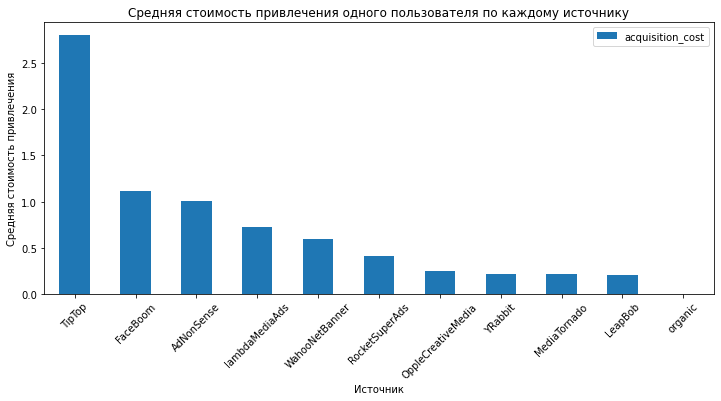

In [34]:
profiles_ac = profiles.groupby('channel').agg({'acquisition_cost': 'mean'})
display(profiles_ac.sort_values(by='acquisition_cost', ascending=False))
fig, ax = plt.subplots(figsize = (12,5))
profiles_ac.sort_values(by='acquisition_cost', ascending=False).plot(kind='bar', ax=ax, rot=45)
plt.title('Средняя стоимость привлечения одного пользователя по каждому источнику')
plt.xlabel('Источник')
plt.ylabel('Средняя стоимость привлечения');

Из графика видно, что самое дорогое CAC - у TipTop - почти в три раза выше, чему у ближайших конкурентов - FaceBoom и AdNonSense.

#### Промежуточный вывод

На данном этапе проведен всесторонний анализ расходов на маркетинг.

- общая сумма расходов на маркетинг составила 105 497,3
- большая часть этой суммы приходится на TipTop и FaceBoom (54 751,30 и 32 445,60 соответственно)
- имеется значительная тенденция к росту расходов по источнику TipTop. Расходы по остальным источникам находятся на стабильном, более низком уровне
- дороже всего привлекать клиентов через источник TipTop - стоимость привлечения почти в три раза выше, чем у ближайших конкурентов

### Оцените окупаемость рекламы

Задача - используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

- Анализ окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверка конверсии пользователей и динамики её изменения, а также удержания пользователей и динамики его изменения. Графики конверсии и удержания.
- Анализе окупаемости рекламы с разбивкой по устройствам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Анализ окупаемость рекламы с разбивкой по странам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Анализ окупаемости рекламы с разбивкой по рекламным каналам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответить на вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?
- Вывод, возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемости рекламы

Исключим из дальнейшего анализа пользователей с органическим трафиком

In [35]:
profiles = profiles.query('channel != "organic"')

Необходимую для построения графиков информацию получим с помощью соответствующей функции

In [36]:
observation_date = pd.to_datetime('2019-11-01')
horizon_days = 14

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

C:\Users\HAL-9000\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


Построим соответствующие графики

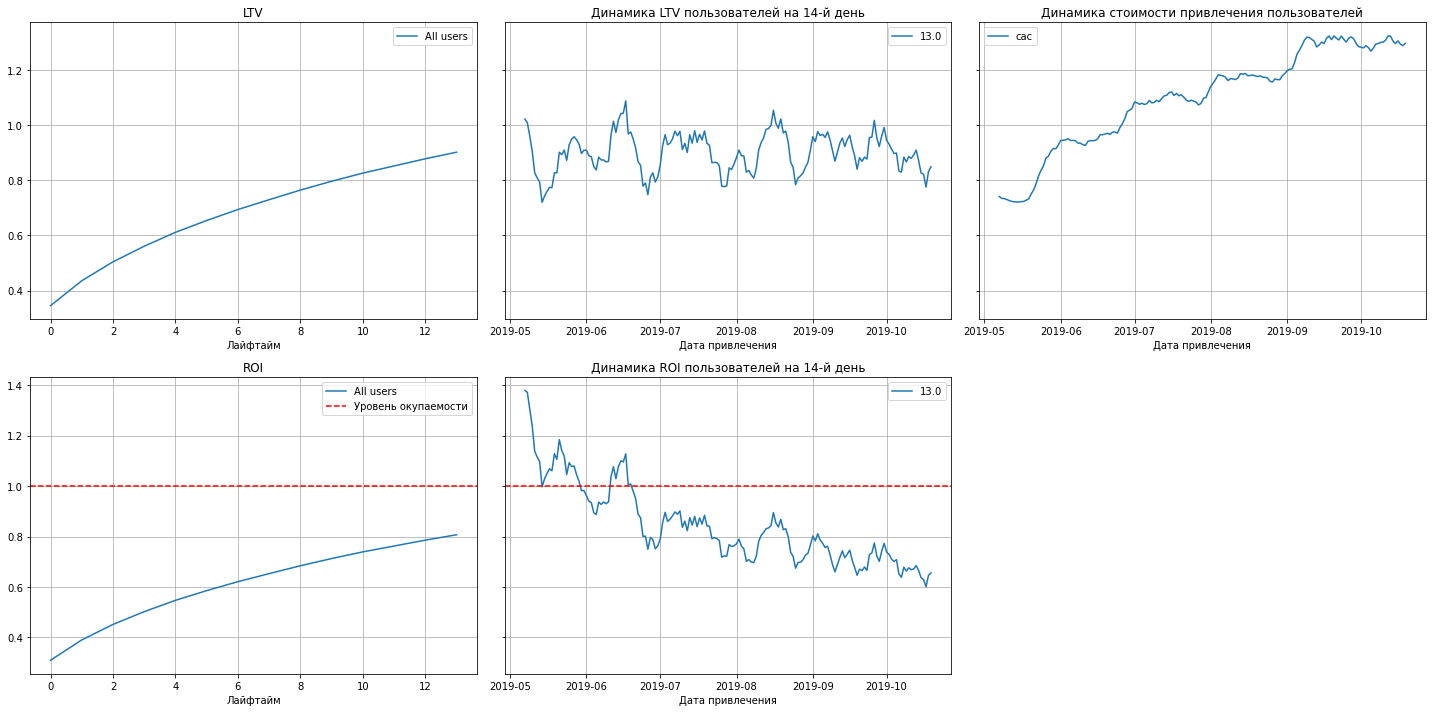

In [37]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Из полученных графиков можно сделать выводы:

- общий LTV имеет четкую тенденцию к росту
- LTV разных когорт на 14-й день нестабилен и колеблется в диапазоне 0,7 - 1,1 c большим количеством пиков. Клиенты разных когорт покупают очень в разных объемах, без очевидной закономерности
- CAC растет скачкообразно, с 4-мя явными скачками в мае, конце июня, клнце июля и начале сентября. Стоимость привлечения пользователя за период выросла почти в два раза - с 0,7 до 1,3
- ROI на конец периода достигает лишь отметки в 80%. Затраты на привлечение не окупились. При этом для майских когорт ROI был стабильно выше 100%, а затем упал.

Падение окупаемости связано с увеличением затрат на рекламу - при относительно стабильном LTV, двукратно вырос CAC, и как следствие снизился ROI. Дорогая реклама себя не окупает.

#### Конверсия и удержание

Необходимую для построения графиков конверсии информацию получим с помощью соответствующей функции

In [38]:
conv_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days)

C:\Users\HAL-9000\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


Построим соответствующие графики

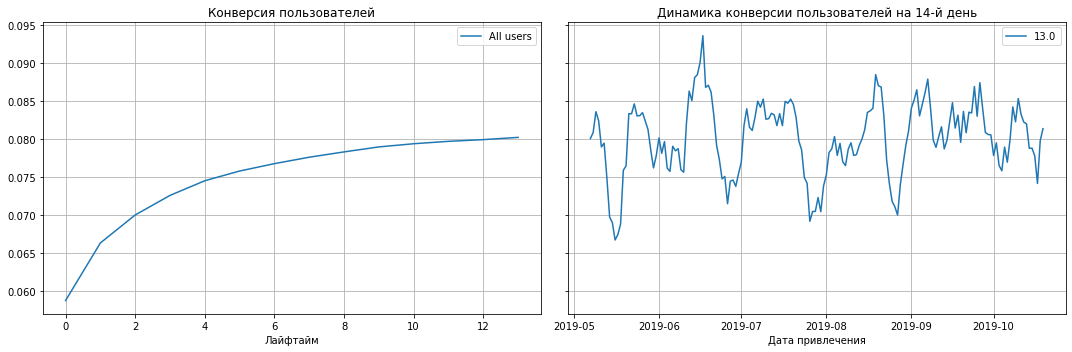

In [39]:
plot_conversion(conversion, conversion_history, horizon_days, window=7)

До 4 лайфтайма конверсия показывает очень хороший рост, на 4 лайфтайме рост замедляется, а на 10 лайфтайме конверсия почти останавливает свой рост, не доходя до показателя 0,058. Значит, после 10 дней в приложении, пользователи практически прекращают делать там покупки.


Необходимую для построения графиков удержания информацию получим с помощью соответствующей функции

In [40]:
ret_raw, retention, retention_history = get_retention(profiles, visits, observation_date, horizon_days)

C:\Users\HAL-9000\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


Построим соответствующие графики

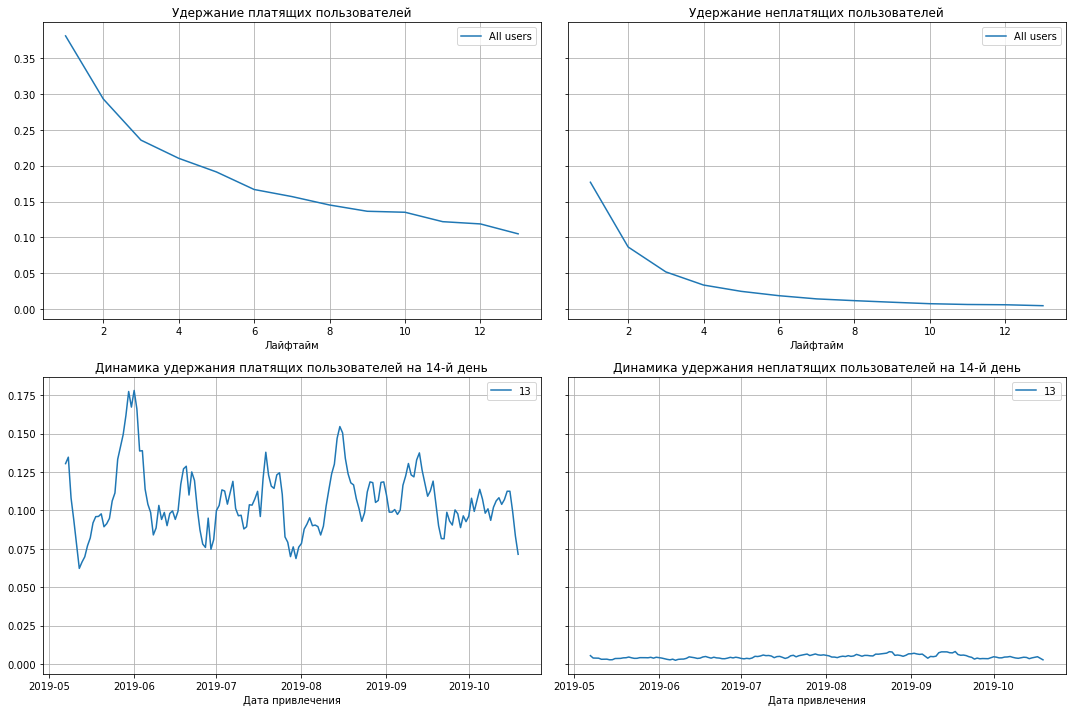

In [41]:
plot_retention(retention, retention_history, horizon_days, window=7)

Удержание платящих пользователей плавно снижается к 14-му дню- с 0,4 до 0,1

Удержание неплатящих уже к 8-му дню падает почти до нуля.

Динамика показывает достаточно стабильные данные для разных когорт платящих пользователей. Также имеется множество хаотичных пиков. 

А удержание неплатящих пользователей на 14 день для всех когорт стабильно близко к нулю.

#### Окупаемость рекламы с разбивкой по устройствам

Для построения графиков окупаемости рекламы с различными разбивками, сначала применим функцию get_ltv с соответствующим параметром dimensions

In [42]:
d_ltv_raw, d_ltv, d_ltv_history, d_roi, d_roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device'])

C:\Users\HAL-9000\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


Затем применим функцию визуализации

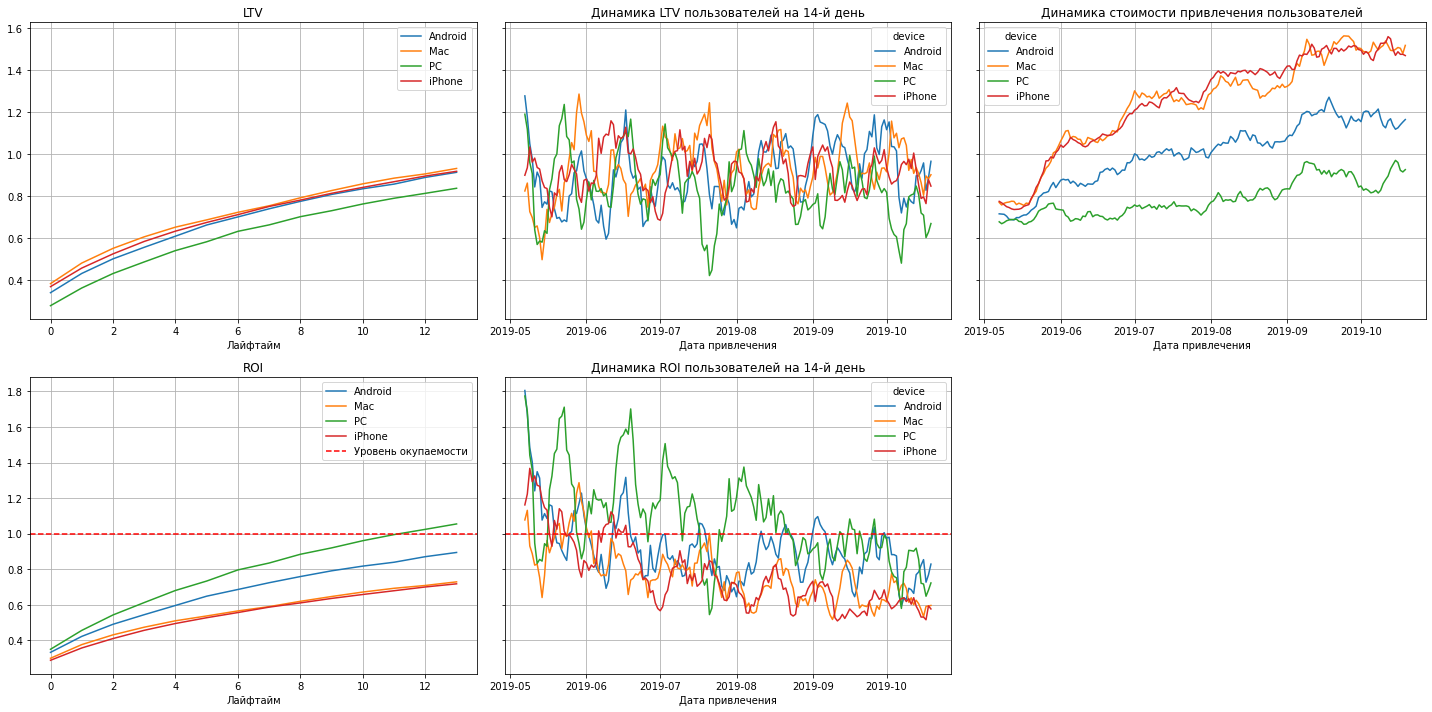

In [43]:
plot_ltv_roi(d_ltv, d_ltv_history, d_roi, d_roi_history, horizon_days, window=7)

В результате анализа графиков, установлено следующее:

- LTV для пользователей трех типов устройств практически полностью идентичен. А пользователи ПК покупают в приложении немного хуже
- динамика LTV распределяется достаточно равномерно среди разных когорт. Для пользователей ПК значения в среднем чуть ниже
- начиная с июня, в разы вырос CAC для каждого типа устройств. Начиная с этого месяца, CAC для IPhone и Mac установился на высоком уровне, Android - значительно ниже, а PC - еще ниже. Значит, стоимость привлечения пользователя IPhone или Mac наиболее высока
- как следствие предыдущего пункта, реклама для Mac и IPhone не окупается, как и реклама для Android. А для ПК реклама окупается на 11 день
- при этом, в динамике окупаемость снижается для всех когорт. В октярбе не окупается ни одна из когорт

#### Окупаемость рекламы с разбивкой по странам

Применим функцию по аналогии с другими параметрами

In [44]:
r_ltv_raw, r_ltv, r_ltv_history, r_roi, r_roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])

C:\Users\HAL-9000\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


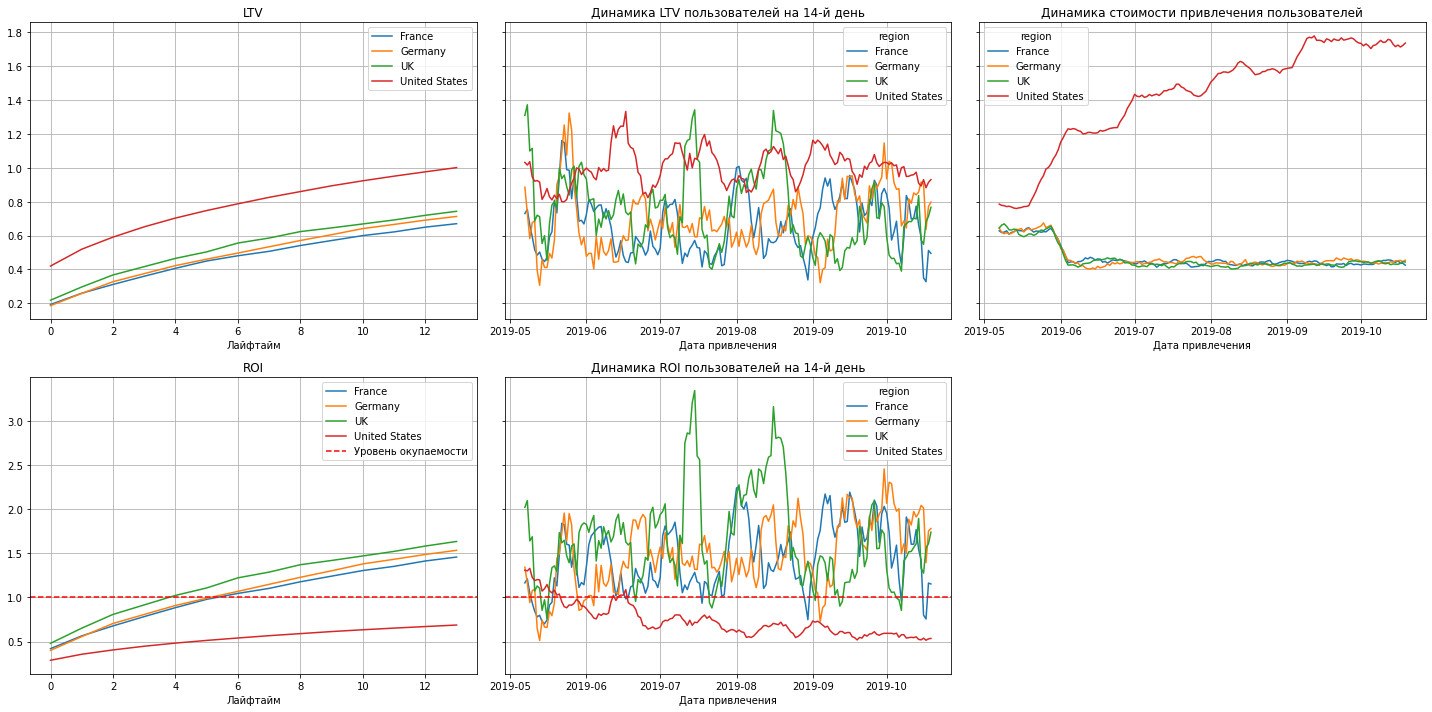

In [45]:
plot_ltv_roi(r_ltv, r_ltv_history, r_roi, r_roi_history, horizon_days, window=7)

В результате анализа графиков, установлено следующее:

- самый высокий LTV (с существенным отрывом) приходится на пользователей из США, самый низкий - на пользователей из Франции
- в динамике прослеживается аналогичная тенденция, однако при этом имеются редкие пики для двух когорт из Германии
- CAC США начиная с июня - в 3 раза выше всех остальных, а с сентября - в 4,5 раза. Для остальных стран CAC примерно идентичен, причем в июне снизался на 50%
- как следствие, реклама для США не окупается. Для других стран окупается очень хорошо - ROI = 1,5 на 12-й день
- в динамике окупаемость на высоком уровне у всех когорт, кроме США

#### Окупаемость рекламы с разбивкой по рекламным каналам

In [46]:
c_ltv_raw, c_ltv, c_ltv_history, c_roi, c_roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])

C:\Users\HAL-9000\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


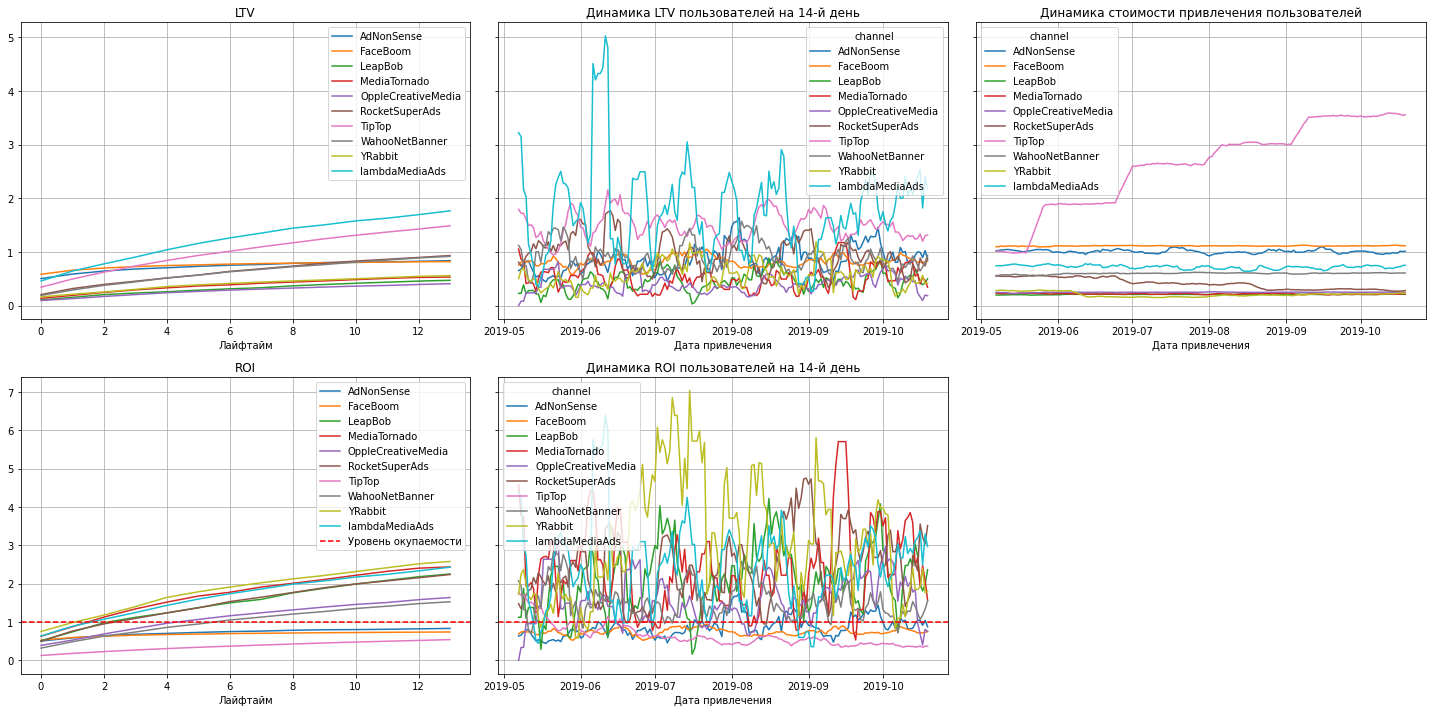

In [47]:
plot_ltv_roi(c_ltv, c_ltv_history, c_roi, c_roi_history, horizon_days, window=7)

В результате анализа графиков, установлено следующее:

- высокий рост LTV прослеживается для источников привлечения lambdaMediaAds и TipTop, причем у первой - лучший результат
- в динамике lambdaMediaAds также побеждает - множество огромных пиков, особенно в июне
- CAC для всех источников находится на стабильном невысоком уровне, за исключением TipTop - здесь CAC увеличивался 4 раза и в итоге стал почти в 4 раза выше, чем у ближайших конкурентов
- по итогу, реклама через TipTop стабильно не окупается. Через большинство других источников окупаемость хорошая.

#### Промежуточный вывод

Как видно, реклама, направленная на привлечение пользователей, в целом не окупается. на 14-й день значение ROI вплотную приближается к уровню окупаемости, но все же его не достигает.

Негативное влияние на окупаемость рекламы оказывают:

- высокая стоимость привлечения пользователей Mac и IPhone
- высокая стоимость привлечения пользователей из США
- высокая стоимость привлечения пользователей через источник TipTop

Затраты на привлечение вышеуказанных пользователей за рассматриваемый период многократно возросли, при этом существенного роста LTV не отмечается.

В качестве рекомендации, следует уменьшить затраты на маркетинг по вышеуказанным направлениям. Данная мера должна привести к увеличению отдельных ROI, и как следствие - к увеличению общей окупаемости.

### Выводы

- Причины неэффективности привлечения пользователей.
- Рекомендации для отдела маркетинга.

Основной причиной неэффективности привлечения пользователей можно обозначить нерациональное распределение бюджета на маркетинг. Необоснованно высока стоимость привлечения клиентов из США, пользователей Mac и IPhone, а также стоимость привлечения клиентов по каналу TipTop. Кроме того, указанные стоимость еще и постоянно растут на рассматриваемом промежутке времени. А рост затрат пользователей растет гораздо медленнее, и как следствие - общая неокупаемость.

В качестве рекомендации, следует перераспределить рекламный бюджет, уменьшив затраты на привлечение пользователей из США, пользователей Mac и IPhone и привлечения клиентов по каналу TipTop.

Наиболее целесообразно высвободившиеся средства направить на выявленные более перспективные направления - на привлечение пользователей PC и Android, пользователей из других регионов. Также крайне перспективными выглядят каналы привлечения клиентов lambdaMediaAds, Yrabbit и RocketSuperAds - у первого отличный LTV, а второй и третий отлично показали себя в динамике.